In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
import edahelp

from sklearn.ensemble import IsolationForest


In [ ]:
file="C:/Users/singh/OneDrive/Desktop/Machine Leanring/Project/train_data.csv"
train=pd.read_csv(file)
train.dtypes


airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [ ]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-15,Delhi,Cochin,2024-08-01 05:35:00,2024-08-01 08:50:00,195,0.0,No Info,5601
1,Jet Airways,2019-05-09,Delhi,Cochin,2024-08-01 10:00:00,2024-08-01 19:00:00,540,1.0,No Info,15554
2,Spicejet,2019-05-18,Mumbai,Hyderabad,2024-08-01 13:15:00,2024-08-01 14:45:00,90,0.0,No Info,2227
3,Indigo,2019-05-06,Kolkata,Banglore,2024-08-01 08:10:00,2024-08-01 13:00:00,290,1.0,No Info,5069
4,Air India,2019-03-21,Delhi,Cochin,2024-08-01 23:00:00,2024-08-01 19:15:00,1215,1.0,No Info,6745
...,...,...,...,...,...,...,...,...,...,...
8364,Indigo,2019-06-03,Banglore,Delhi,2024-08-01 08:30:00,2024-08-01 11:20:00,170,0.0,No Info,4823
8365,Jet Airways,2019-03-21,Banglore,New Delhi,2024-08-01 07:00:00,2024-08-01 21:20:00,860,1.0,In-flight meal not included,7832
8366,Indigo,2019-04-03,Delhi,Cochin,2024-08-01 10:35:00,2024-08-01 15:35:00,300,1.0,No Info,5073
8367,Indigo,2019-04-27,Delhi,Cochin,2024-08-01 05:35:00,2024-08-01 08:50:00,195,0.0,No Info,6015


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          8369 non-null   object        
 1   date_of_journey  8369 non-null   datetime64[ns]
 2   source           8369 non-null   object        
 3   destination      8369 non-null   object        
 4   dep_time         8369 non-null   datetime64[ns]
 5   arrival_time     8369 non-null   datetime64[ns]
 6   duration         8369 non-null   int64         
 7   total_stops      8368 non-null   float64       
 8   additional_info  8369 non-null   object        
 9   price            8369 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 654.0+ KB


In [ ]:

edahelp.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

ValueError: Could not interpret value `price` for parameter `y`

In [ ]:
train.dtypes


airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [ ]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [ ]:
print(train.info())
train.describe(include="number")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          800 non-null    object        
 1   date_of_journey  800 non-null    datetime64[ns]
 2   source           800 non-null    object        
 3   destination      800 non-null    object        
 4   dep_time         800 non-null    datetime64[ns]
 5   arrival_time     800 non-null    datetime64[ns]
 6   duration         800 non-null    int64         
 7   total_stops      800 non-null    float64       
 8   additional_info  800 non-null    object        
 9   price            800 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 62.6+ KB
None


,duration,total_stops,price
count,800.000000,800.000000,800.000000
mean,652.112500,0.817500,9108.721250
std,509.310658,0.659346,4543.204856
min,75.000000,0.000000,1759.000000
25%,175.000000,0.000000,5376.750000
50%,550.000000,1.000000,8542.000000
75%,936.250000,1.000000,12122.000000
max,2420.000000,3.000000,46490.000000


In [ ]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)
edahelp.missing_info(train)


,count,percentage
variable,,


In [ ]:
edahelp.missing_info(train)
forest = IsolationForest(n_estimators=10, random_state=42)



In [ ]:
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Air India,2019-05-24,Kolkata,Banglore,2024-08-01 09:50:00,2024-08-01 12:30:00,1600,2.0,No Info,15170,-1
2,Air India,2019-05-15,Delhi,Cochin,2024-08-01 18:45:00,2024-08-01 19:15:00,1470,2.0,No Info,13307,-1
4,Jet Airways,2019-05-12,Kolkata,Banglore,2024-08-01 20:25:00,2024-08-01 21:05:00,1480,1.0,No Info,12121,-1
6,Indigo,2019-05-15,Mumbai,Hyderabad,2024-08-01 02:35:00,2024-08-01 04:05:00,90,0.0,No Info,2754,-1
12,Jet Airways,2019-06-03,Delhi,Cochin,2024-08-01 02:15:00,2024-08-01 04:25:00,1570,1.0,In-flight meal not included,11627,-1
...,...,...,...,...,...,...,...,...,...,...,...
784,Air India,2019-03-03,Banglore,New Delhi,2024-08-01 06:45:00,2024-08-01 23:55:00,1030,2.0,No Info,10573,-1
787,Jet Airways,2019-05-18,Kolkata,Banglore,2024-08-01 14:05:00,2024-08-01 08:15:00,1090,1.0,No Info,14388,-1
788,Jet Airways,2019-06-12,Delhi,Cochin,2024-08-01 20:00:00,2024-08-01 19:00:00,1380,2.0,No Info,14300,-1
792,Indigo,2019-05-09,Delhi,Cochin,2024-08-01 05:35:00,2024-08-01 08:50:00,195,0.0,No Info,5000,-1


In [ ]:
edahelp.pair_plots(train)


In [ ]:
edahelp.correlation_heatmap(train)


In [ ]:
edahelp.cramersV_heatmap(train)


AttributeError: 'tuple' object has no attribute 'statistic'

In [ ]:
train.columns


Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [ ]:
train.airline


0              Air India
1                 Indigo
2              Air India
3      Multiple Carriers
4            Jet Airways
             ...        
795    Multiple Carriers
796               Indigo
797               Indigo
798    Multiple Carriers
799            Air India
Name: airline, Length: 800, dtype: object

In [ ]:
edahelp.cat_summary(train, "airline")


0              Air India
1                 Indigo
2              Air India
3      Multiple Carriers
4            Jet Airways
             ...        
795    Multiple Carriers
796               Indigo
797               Indigo
798    Multiple Carriers
799            Air India
Name: airline, Length: 800, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 800 / 800 rows


,
count,800
unique,8
top,Jet Airways
freq,285


,count,percentage
category,,
Jet Airways,285,0.35625
Indigo,170,0.21250
Air India,129,0.16125
Multiple Carriers,92,0.11500
Spicejet,57,0.07125
Vistara,33,0.04125
Air Asia,23,0.02875
Goair,11,0.01375


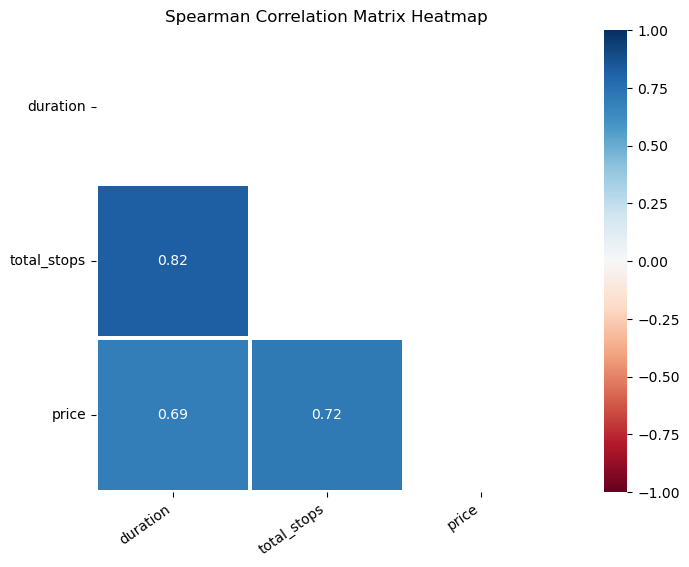

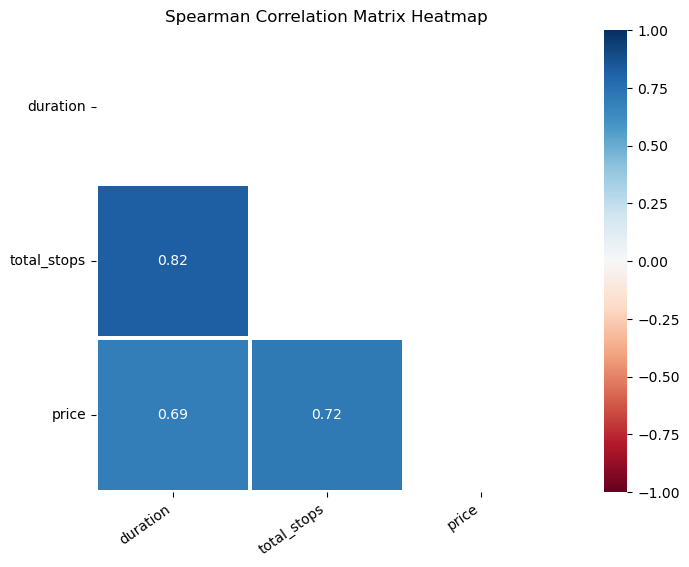

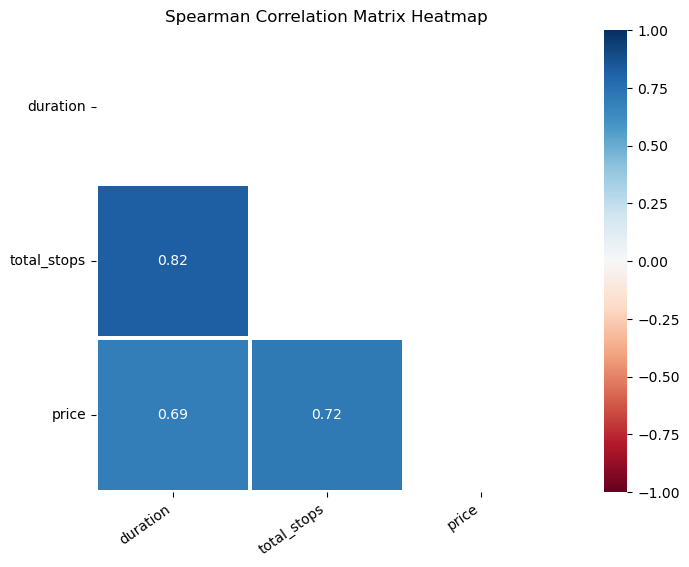

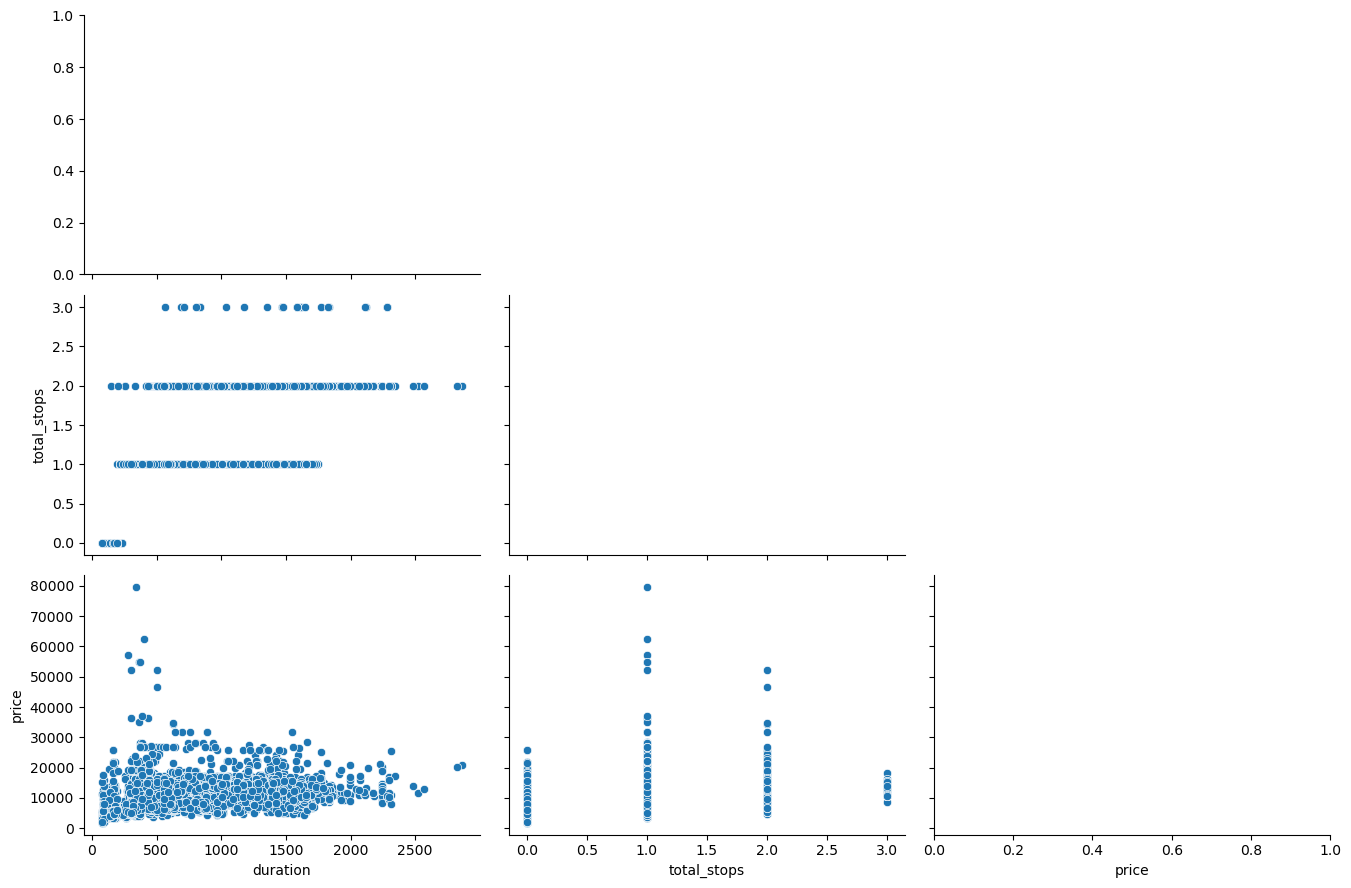

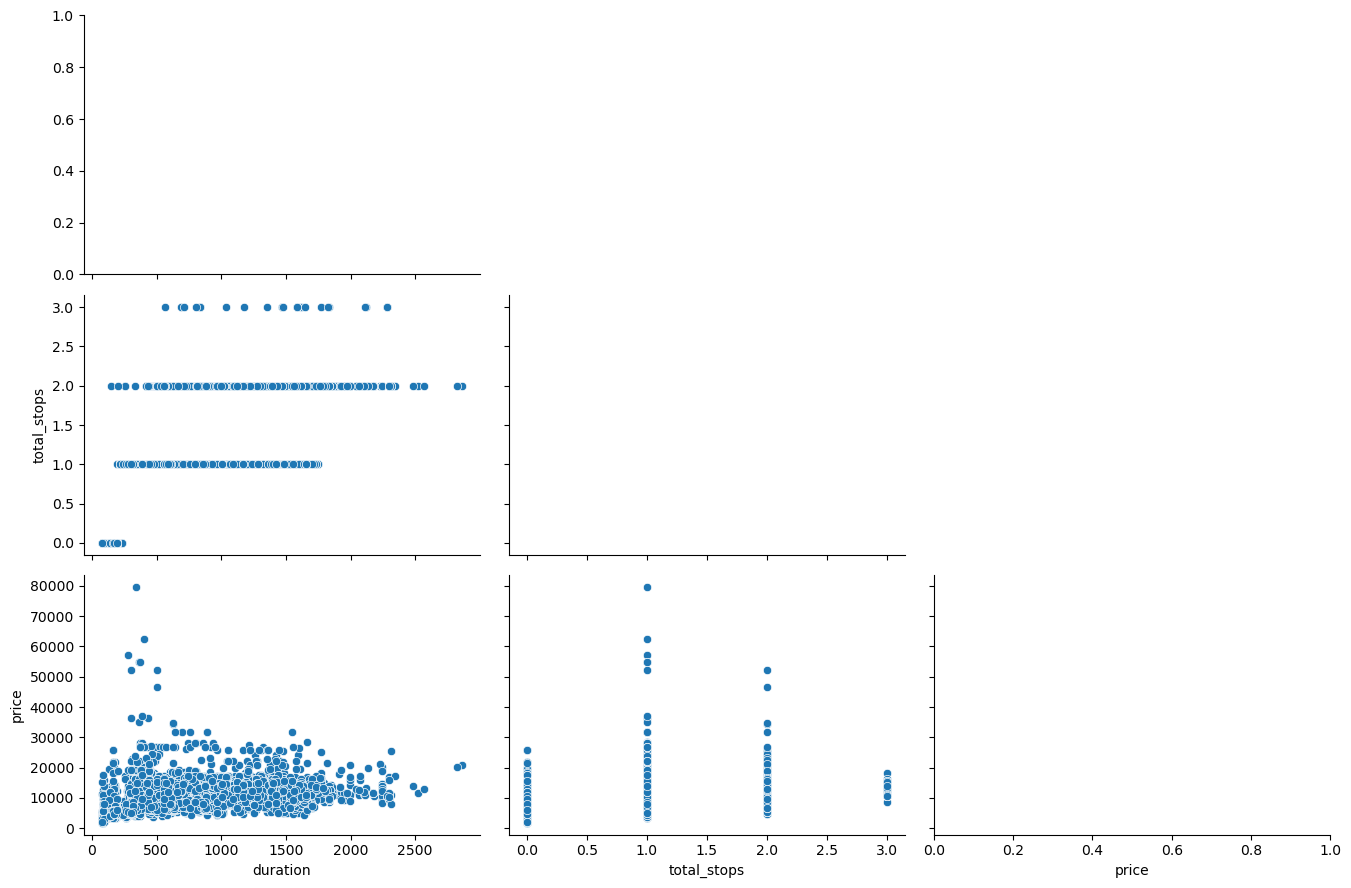

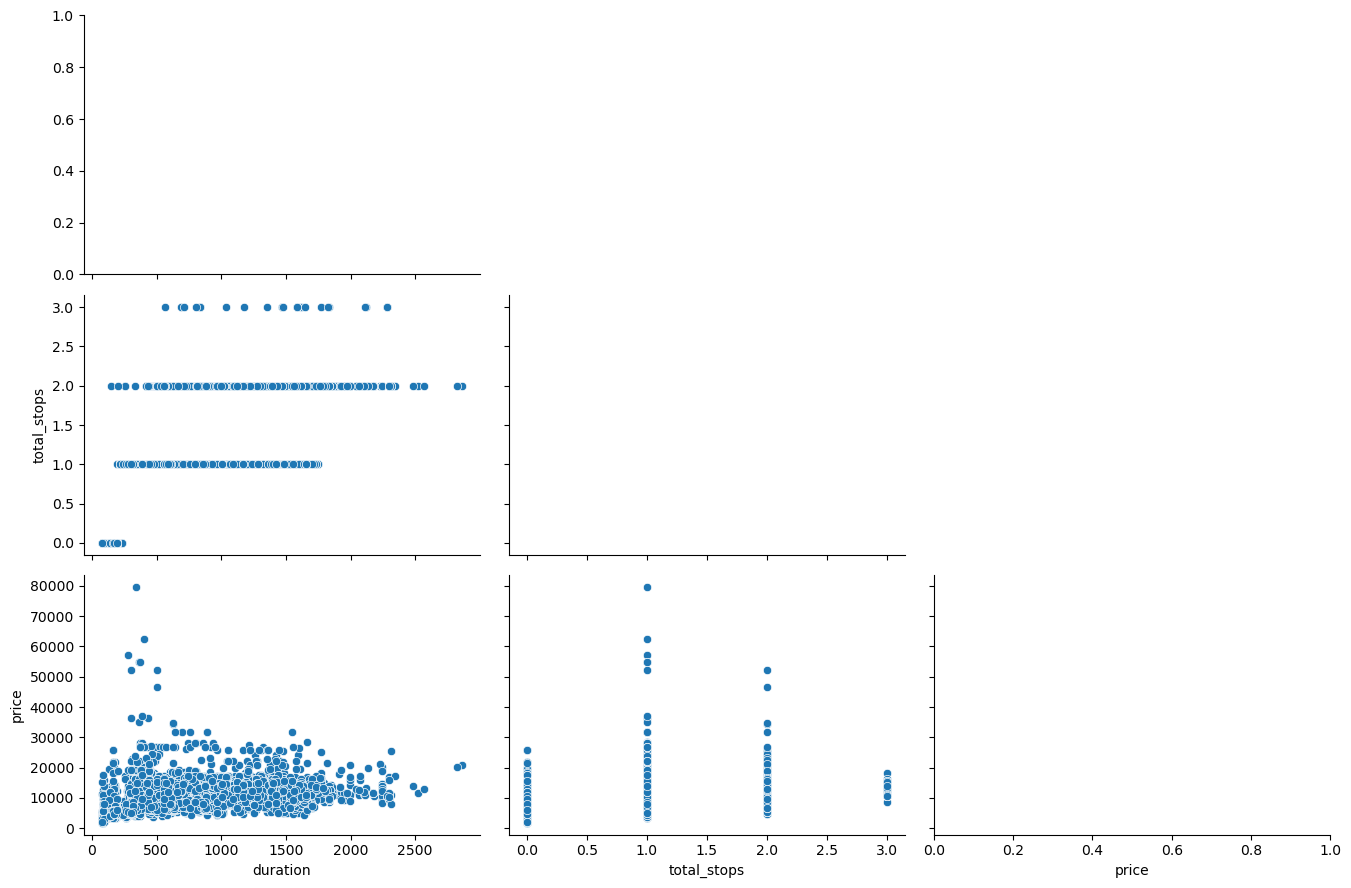

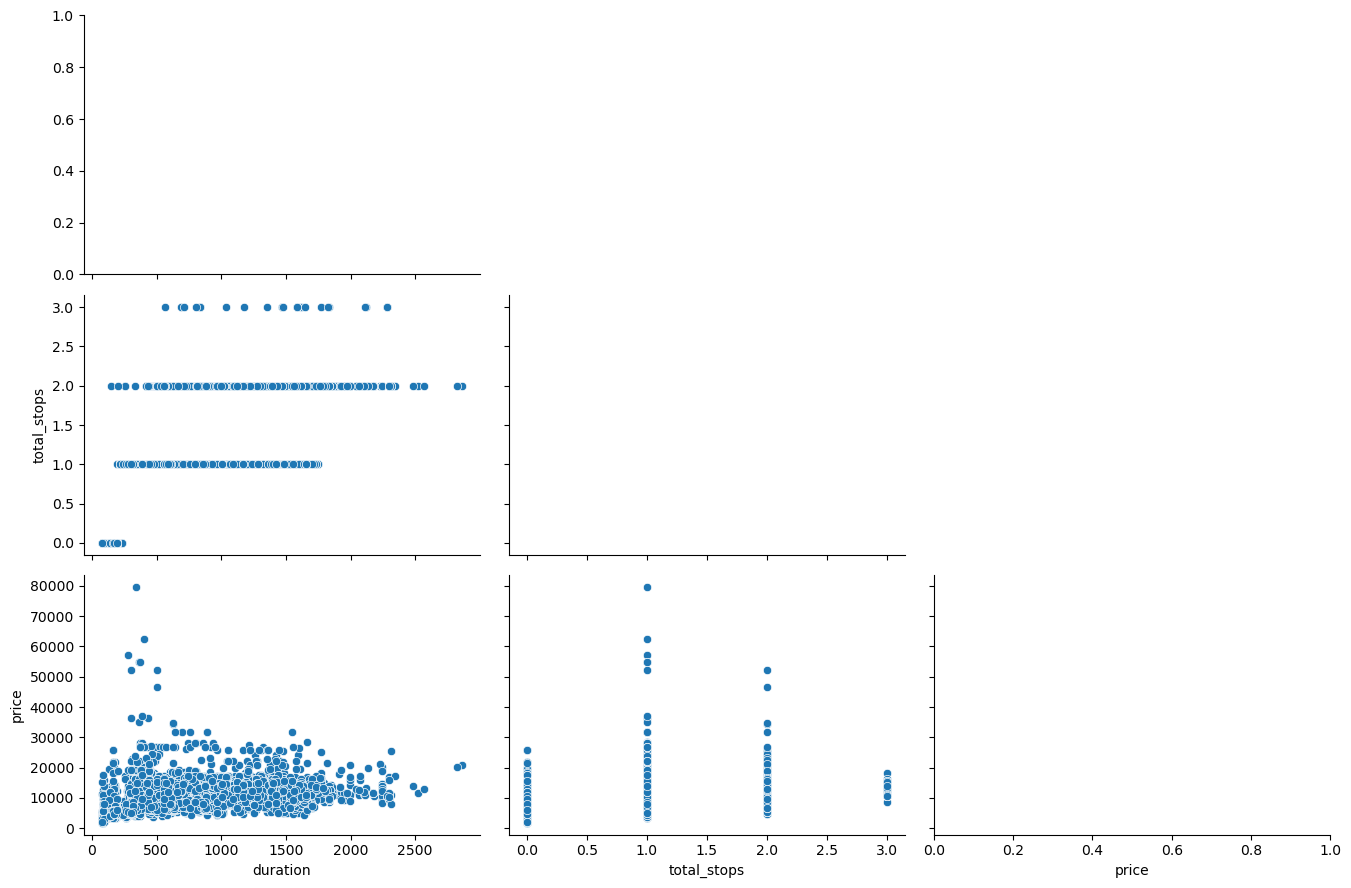

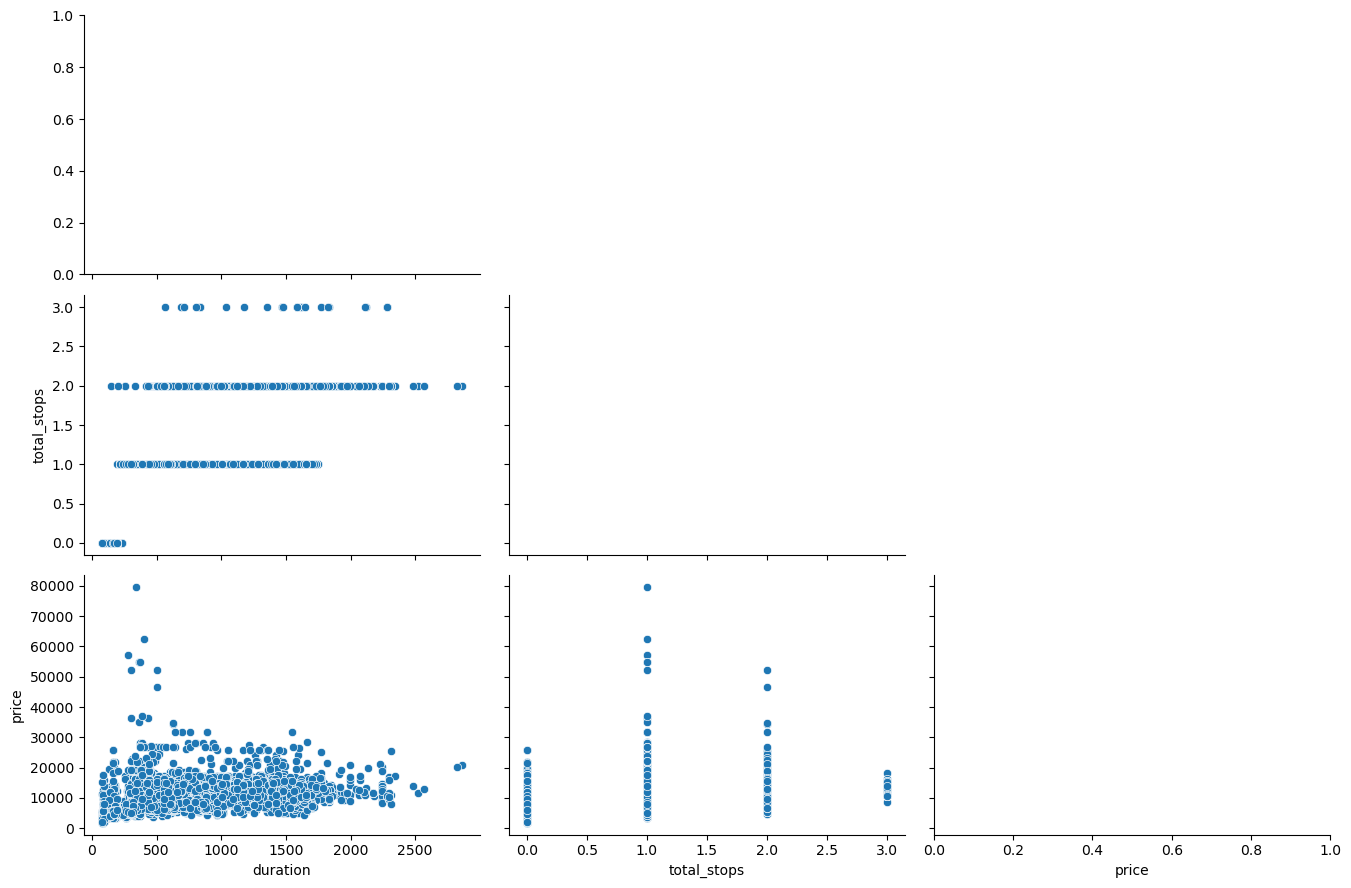

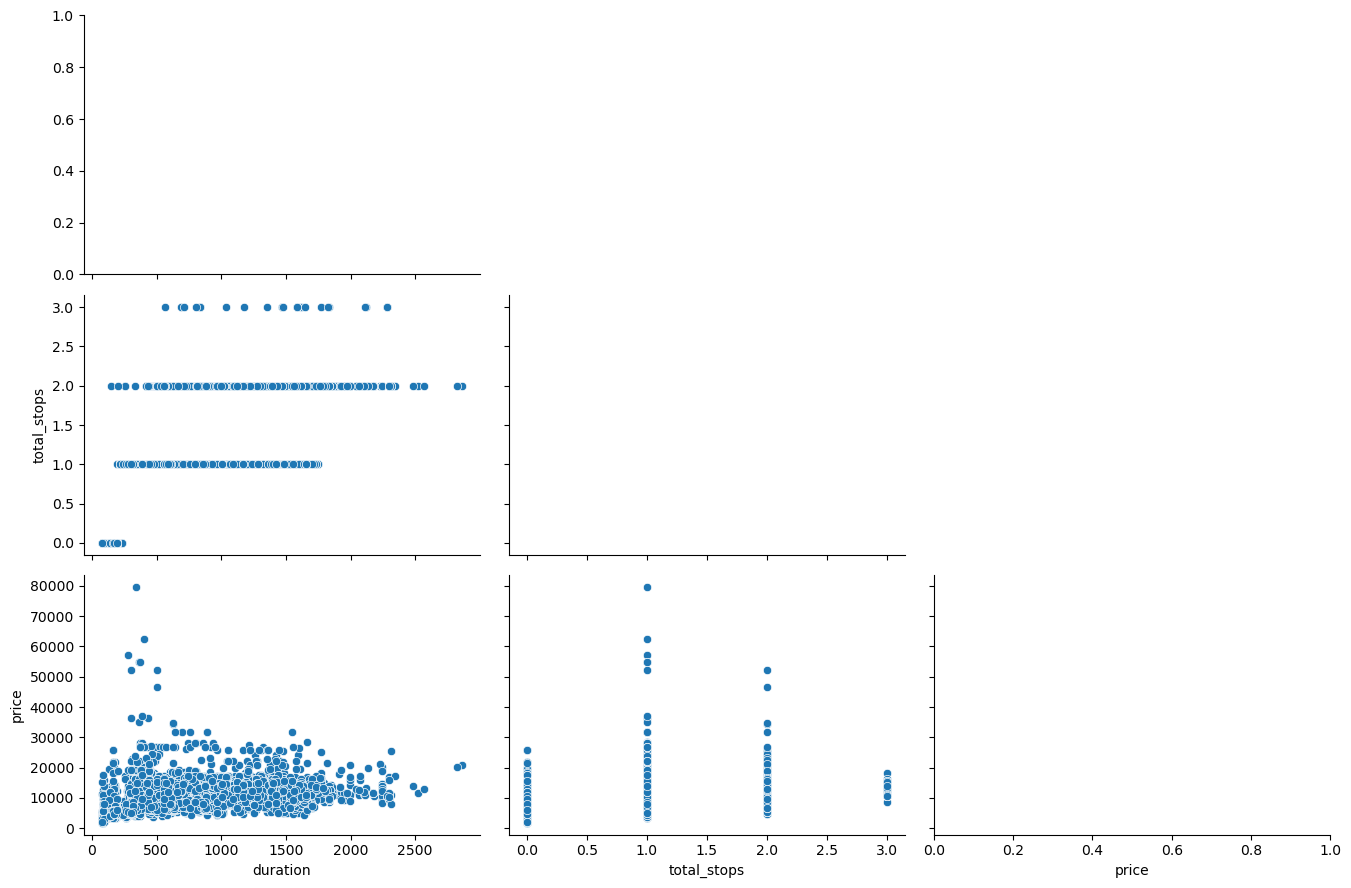

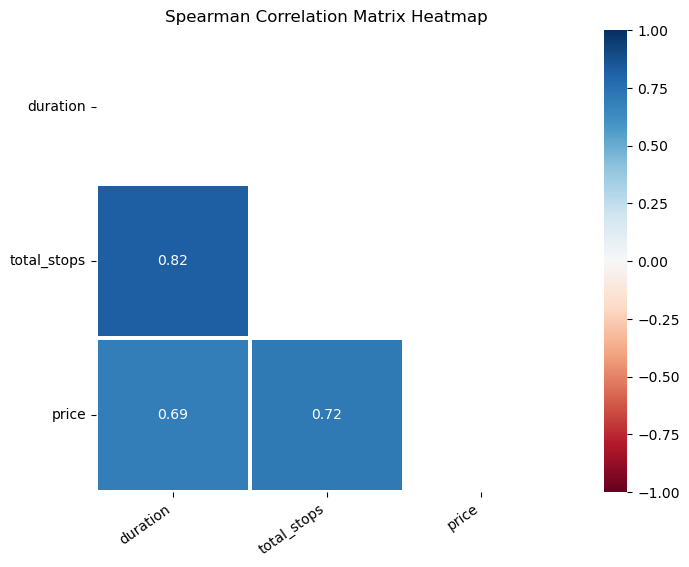

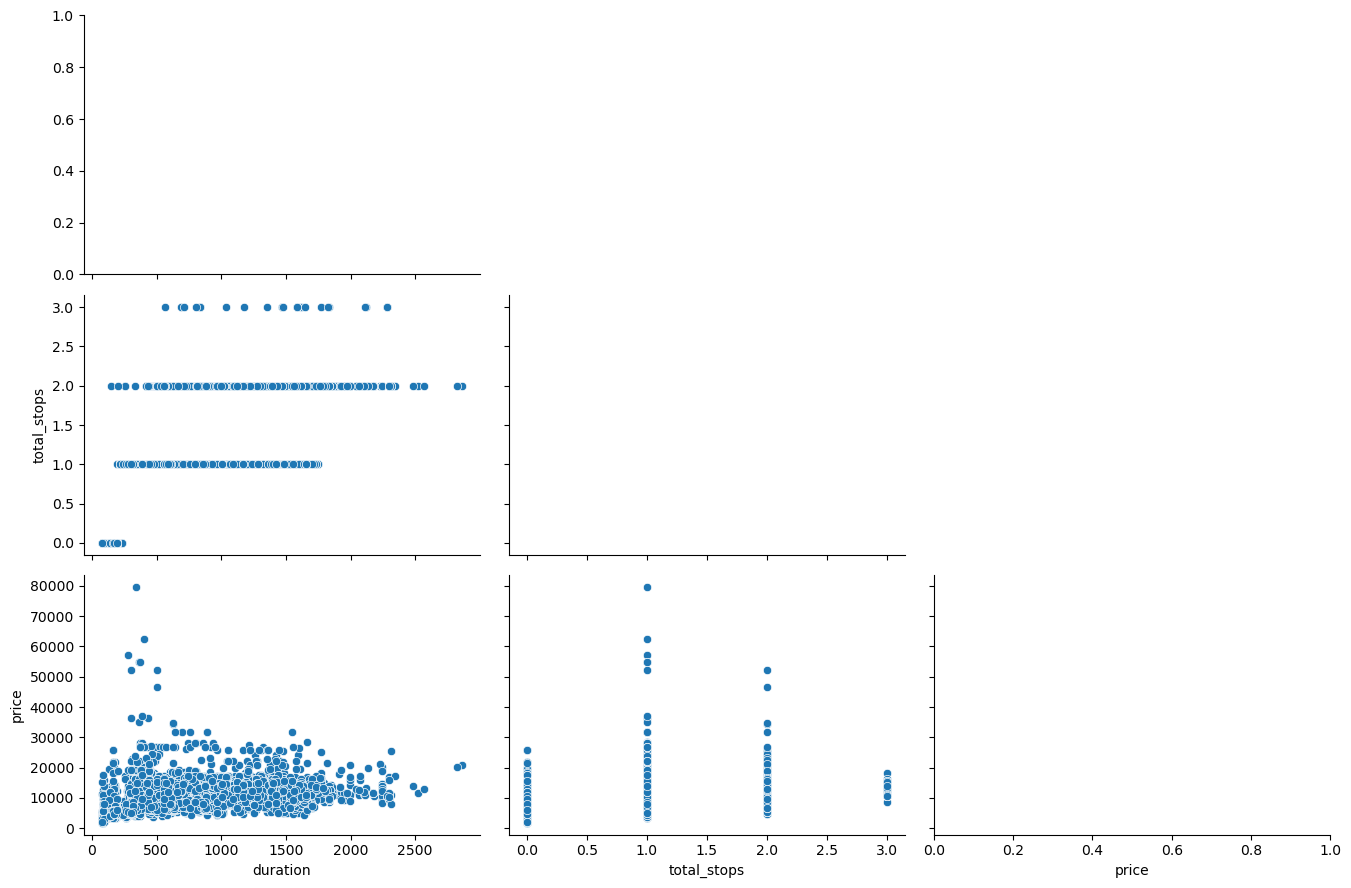

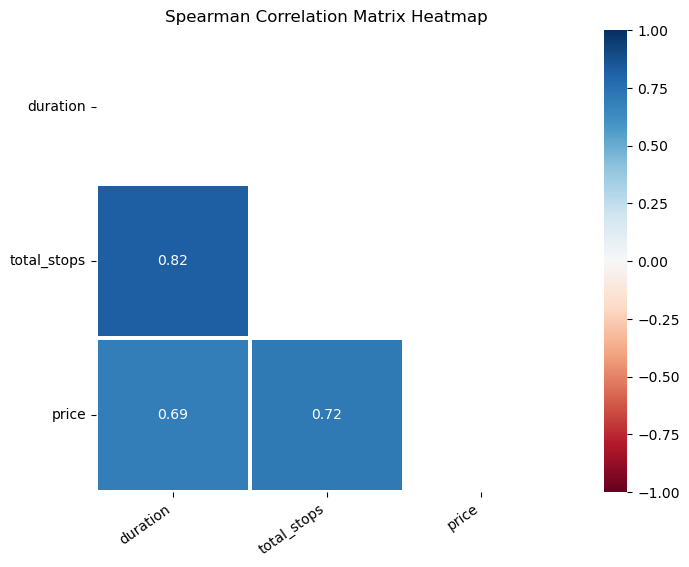

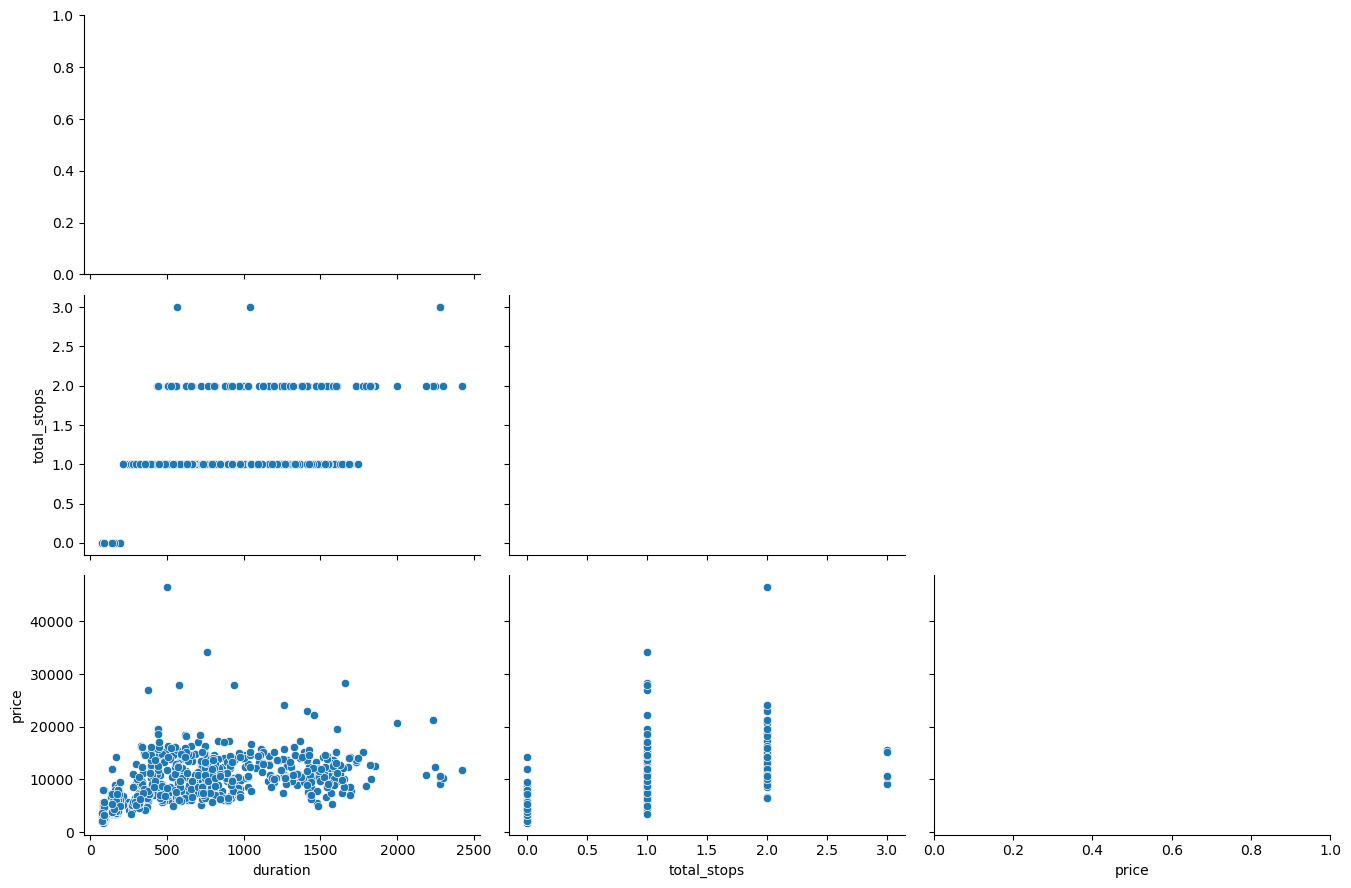

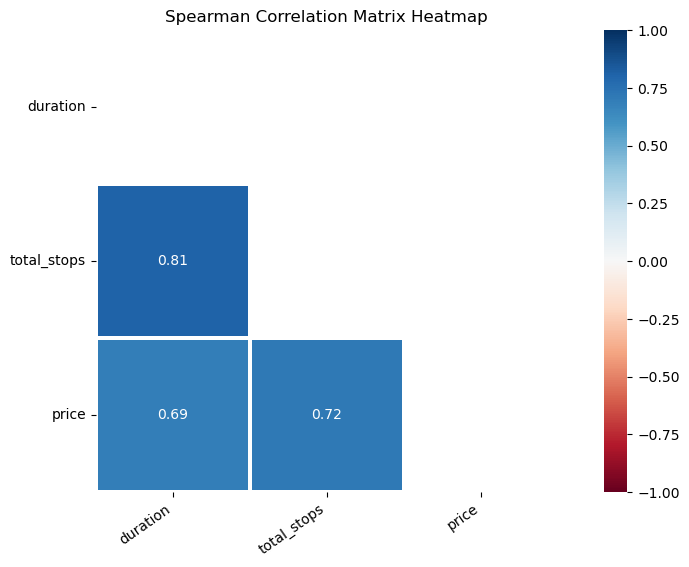

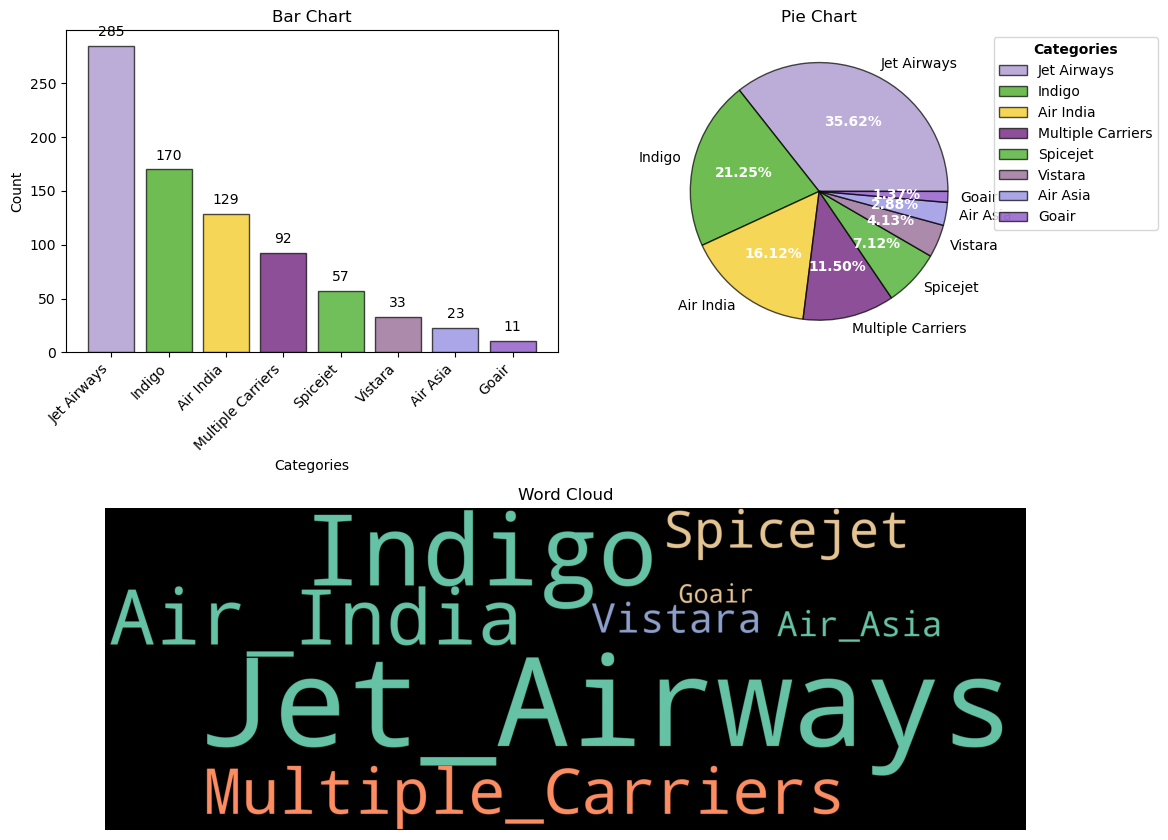

In [ ]:
edahelp.cat_univar_plots(train, "airline")


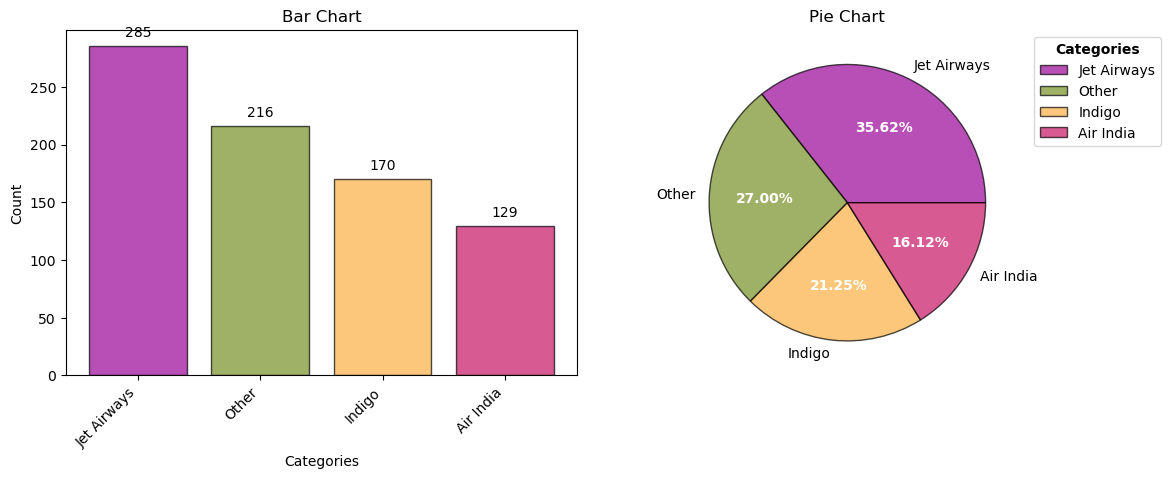

In [ ]:
edahelp.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)


In [ ]:
edahelp.num_cat_bivar_plots(
	data=train,
	num_var='price',
	cat_var="airline"
)

ValueError: Could not interpret input 'price'

In [ ]:
edahelp.num_cat_hyp_testing(train, "price", "airline")


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 571.7959606959738
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3856.6408669363445
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


In [ ]:

airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	edahelp.rotate_xlabels(ax)

AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [ ]:
train.date_of_journey


0     2019-05-24
1     2019-06-21
2     2019-05-15
3     2019-06-15
4     2019-05-12
         ...    
795   2019-03-03
796   2019-06-21
797   2019-03-06
798   2019-06-12
799   2019-05-21
Name: date_of_journey, Length: 800, dtype: datetime64[ns]

In [ ]:
edahelp.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

In [ ]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
edahelp.rotate_xlabels(ax)

In [ ]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
edahelp.rotate_xlabels(ax)

In [ ]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

edahelp.rotate_xlabels(ax)

In [ ]:
train.dep_time
edahelp.dt_univar_plots(train, "dep_time", "price")



OptionError: "No such keys(s): 'mode.use_inf_as_null'"

In [ ]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(edahelp.num_cat_bivar_plots, "price", "dep_time")
)

ValueError: Could not interpret input 'price'

In [ ]:
print(train.duration)
edahelp.num_summary(train, "duration")



0      1600
1       180
2      1470
3       450
4      1480
       ... 
795     450
796      90
797     140
798     845
799     795
Name: duration, Length: 800, dtype: int64


0      1600
1       180
2      1470
3       450
4      1480
       ... 
795     450
796      90
797     140
798     845
799     795
Name: duration, Length: 800, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 800 / 800 rows


,value
percentile,
0,75.00
5,135.00
10,145.00
25,175.00
50,550.00
75,936.25
90,1450.50
95,1585.25
99,1996.90


,value
mean,652.112500
trimmed mean (5%),619.263889
trimmed mean (10%),592.679688
median,550.000000


,value
var,259397.346527
std,509.310658
IQR,761.250000
mad,375.000000
coef_variance,0.781017


,value
skewness,0.860837
kurtosis,-0.101528


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 2.5171841510787788e-23
Test Statistic       : 0.8910248875617981
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.783
Test Statistic       : 28.075467028739922
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [ ]:
train.duration.quantile([0.25, 0.5, 0.75])


0.25    175.00
0.50    550.00
0.75    936.25
Name: duration, dtype: float64

In [ ]:
edahelp.num_univar_plots(train, "duration")


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

In [ ]:
edahelp.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

ValueError: Could not interpret value `price` for parameter `y`